In [5]:
import h5py
import numpy as np    
import matplotlib.pyplot as plt
import pandas as pd

# load dataset


In [32]:
######## Very basic access to the dataset - let's see what we are working with! #######
raw_dataset = h5py.File('dataset/climatevisions_2019.h5','r+') 

# Access the 'upper' data - we only have tweet data 
for item in raw_dataset.keys():
    print("Items: " + item)    
    
# Access the actual subgroups with data for us - different info we can look at - mostly things provided in Excel by Katharina
for item in raw_dataset.require_group('tweet_data').keys():
    continue  ### comment this out if you want to see categories we have and use print
    #print(item)

# Access the dataset within the group
dataset = raw_dataset['tweet_data']  ## excludes unnecessary information - only tweet_data
 
# Create a dictionary to store column data
data_dict = {}
    
# Iterate through the keys (assuming each key is a column name)
for key in dataset.keys():
     # Access the data for each column
     column_data = dataset[key][:]
        
     # Store the data in the dictionary with the column name as the key
     data_dict[key] = column_data
 
# Convert the dictionary to a Pandas DataFrame
df = pd.DataFrame(data_dict)
df.head()


Items: tweet_data


,author_id,created_at,edit_history_tweet_ids,entities_annotations,entities_cashtags,entities_hashtags,entities_mentions,entities_urls,geo_coord_data,geo_coord_type,...,possibly_sensitive,quote_count,referenced_tweets,reply_count,retweet_count,source,text,tweet_id,withheld_copyright,withheld_countrycode
0,b'24931983',b'2019-01-01T23:59:01.000Z',b'1080252082781855744',"b'start:30, end:31, probability:0.4413, type:P...",b':NA',b'NA',b'NA',"b'start1:66, start2:90, end1:89, end2:113, url...",b'NA',b'NA',...,True,0,b'NA',0,0,b'CoSchedule',b'Kids Win the Right to Sue the US Government ...,b'1080252082781855744',b'NA',b'NA'
1,b'2602968048',b'2019-01-01T23:57:02.000Z',b'1080251584729223173',b'NA',b':NA',b'NA',b'NA',"b'start:278, end:301, url:https://t.co/is0NHYP...",b'NA',b'NA',...,True,0,b'NA',0,0,b'Twitter Web Client',b'Wat zou de eenvoudigste verklaring zijn dat ...,b'1080251584729223173',b'NA',b'NA'
2,b'734730931848634368',b'2019-01-01T23:55:49.000Z',b'1080251277693595649',b'NA',b':NA',b'NA',b'NA',"b'start1:55, start2:260, end1:78, end2:283, ur...",b'NA',b'NA',...,True,0,b'NA',0,0,b'Twitter for iPad',"b""Here's what's on the radar for climate chang...",b'1080251277693595649',b'NA',b'NA'
3,b'1242955585',b'2019-01-01T23:53:00.000Z',b'1080250568583585792',"b'start:52, end:78, probability:0.4544, type:O...",b':NA',b'NA',"b'start1:82, start2:99, end1:95, end2:109, use...","b'start1:140, start2:164, end1:163, end2:187, ...",b'NA',b'NA',...,True,0,b'NA',0,0,b'TweetDeck',"b'The biggest story of the year, for all of hu...",b'1080250568583585792',b'NA',b'NA'
4,b'18085565',b'2019-01-01T23:51:36.000Z',b'1080250217524539393',"b'start:122, end:127, probability:0.7755, type...",b':NA',"b'start1:184, start2:239, start3:262, end1:196...","b'start1:248, start2:275, end1:261, end2:283, ...","b'start:284, end:307, url:https://t.co/jqCU6Ds...",b'NA',b'NA',...,True,0,b'NA',0,0,b'Twitter Web Client',b'Still celebrating 2016 w stale Crystal & ran...,b'1080250217524539393',b'NA',b'NA'


In [33]:
# strip of "b'" of all strings

cols_to_strip = [
        'author_id', 'created_at', 'edit_history_tweet_ids', 'entities_annotations', 
        'entities_hashtags', 'entities_mentions', 'entities_urls', 'geo_coord_data',
        'geo_coord_type', 'geo_placeid', 'img_name', 'img_size', 'in_reply_to_user_id',
        'lang', 'media_keys', 'referenced_tweets', 'source', 'text', 'tweet_id', 
        'withheld_copyright', 'withheld_countrycode', 'entities_cashtags'
        ]   

df[cols_to_strip] = df[cols_to_strip].astype('string')
df[cols_to_strip] = df[cols_to_strip].replace(to_replace=r'^b\':?(.*)\'$', value=r'\1', regex=True)

print(df.shape)
df.dtypes

# replace string NA to "real" missing value for further analysis
df = df.replace(r'^NA$', np.nan, regex=True)
df.isna().sum()


## only keep images here
# drop all columns exepct img_ columns
selected_columns = ['img_name', 'img_size']
df_selected = df.loc[:, selected_columns]
df_selected.head()

(714769, 27)


,img_name,img_size
0,id_1080252082781855744_2019-01-01.jpg,"(533, 1200, 3)"
1,id_1080251584729223173_2019-01-01.jpg,"(675, 1200, 3)"
2,id_1080251277693595649_2019-01-01.jpg,"(349, 620, 3)"
3,id_1080250568583585792_2019-01-01.jpg,"(348, 620, 3)"
4,id_1080250217524539393_2019-01-01.jpg,"(720, 960, 3)"


# Random image display

File not found: dataset/id_1168852891618217984_2019-09-03.jpg
File not found: dataset/id_1185864644591865856_2019-10-20.jpg
File not found: dataset/id_1142288613587193856_2019-06-22.jpg
File not found: dataset/id_1125886697332518912_2019-05-07.jpg
File not found: dataset/id_1133659843812843521_2019-05-29.jpg
File not found: dataset/id_1200128100488613888_2019-11-28.jpg


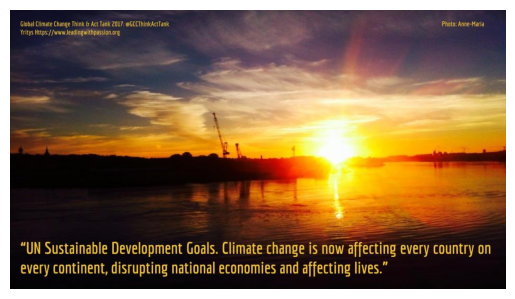

File not found: dataset/id_1127933333692874752_2019-05-13.jpg
File not found: dataset/id_1130201634036961280_2019-05-19.jpg


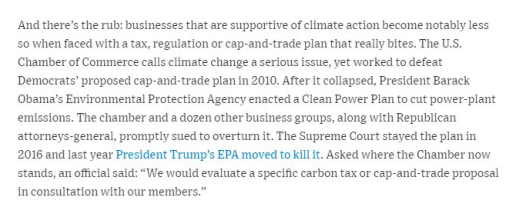

In [35]:
import random
random_indices = random.sample(range(len(df_selected)), 10)

for index in random_indices:
    row = df_selected.iloc[index]
    img_name = row['img_name'].replace("\n", "")
    path = f"dataset/{img_name}"
    try:
        img = plt.imread(path) 
        plt.imshow(img)
        plt.axis('off')
        plt.show() 
    except FileNotFoundError:
        print(f"File not found: {path}")
        continue
    

# Image Content Analysis using Lens


https://github.com/ContextualAI/lens

In [10]:
import requests
from lens import Lens, LensProcessor
from PIL import Image
import torch
image_path = "dataset/id_1112515229991067648_2019-04-01.jpg"
image = Image.open(image_path).convert("RGB")
question = "What is the image about?"

lens = Lens()
processor = LensProcessor()
with torch.no_grad():
    samples = processor([image],[question])
    output = lens(samples)
    prompts = output["prompts"]

Generating visualgenome split: 100%|██████████| 1913/1913 [00:00<00:00, 805511.85 examples/s]


In [23]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

caption = output['caption']
print(caption[0])
# tokenize caption
tokens = word_tokenize(caption[0])
print(tokens)
# remove stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
print(filtered_tokens)

a man standing at a podium in front of a crowd
['a', 'man', 'standing', 'at', 'a', 'podium', 'in', 'front', 'of', 'a', 'crowd']
['man', 'standing', 'podium', 'front', 'crowd']


# Segmentation with CLIP 

(https://huggingface.co/blog/vision_language_pretraining#clipseg-for-zero-shot-image-segmentation)

In [24]:
from transformers import CLIPSegProcessor, CLIPSegForImageSegmentation

processor = CLIPSegProcessor.from_pretrained( "CIDAS/clipseg-rd64-refined" )
model = CLIPSegForImageSegmentation.from_pretrained( "CIDAS/clipseg-rd64-refined" )

In [25]:
from PIL import Image
import requests
#change the image to a local image in dataset/

image_path = "dataset/id_1112515229991067648_2019-04-01.jpg"
image = Image.open(image_path)
texts = ["a presenter", "a presentation", "an audience"]
texts = filtered_tokens # use tokens from lens instead of manual annotations
inputs = processor(text=texts, images=[image] *  len(texts), padding=True, return_tensors="pt")

In [26]:
import torch

with torch.no_grad():
    outputs = model(**inputs)

logits = outputs.logits
print(logits.shape)

torch.Size([5, 352, 352])


[Text(0, -15, 'man'),
 Text(0, -15, 'standing'),
 Text(0, -15, 'podium'),
 Text(0, -15, 'front'),
 Text(0, -15, 'crowd')]

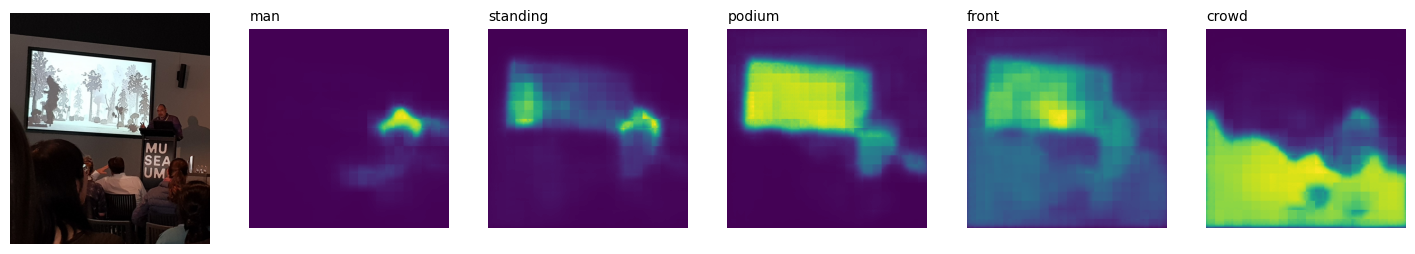

In [27]:
import matplotlib.pyplot as plt

logits = logits.unsqueeze( 1)

_, ax = plt.subplots( 1, len(texts) + 1, figsize=(3*(len(texts) + 1), 12))
[a.axis('off') for a in ax.flatten()]
ax[0].imshow(image)
[ax[i+ 1].imshow(torch.sigmoid(logits[i][ 0])) for i in range(len(texts))];
[ax[i+1].text(0, -15, prompt) for i, prompt in enumerate(texts)]



# OCR


https://huggingface.co/docs/transformers/main/en/model_doc/trocr

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-printed and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


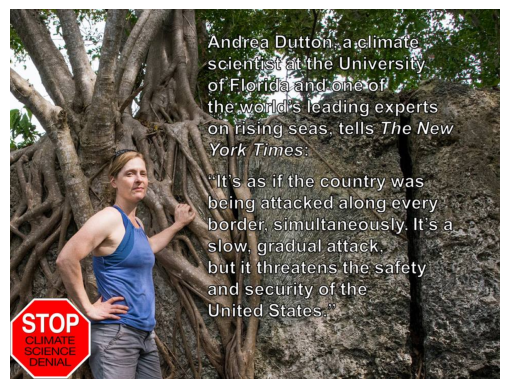

T


In [9]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
import requests
from PIL import Image

# model performance not good yet (TODO look for alternatives)
processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-printed")
model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-printed")

image_path = "dataset/id_1112516747104604162_2019-04-01.jpg" #dataset/id_1112516747104604162_2019-04-01.jpg
image = Image.open(image_path).convert("RGB")

plt.imshow(image)
plt.axis('off')
plt.show() 

pixel_values = processor(image, return_tensors="pt").pixel_values
generated_ids = model.generate(pixel_values)

generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
print(generated_text)

In [7]:
print(generated_text)

Download as PDFPrintable version
